In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
import scipy.io
import numpy as np

# Load .mat file
mat_data = scipy.io.loadmat('multiview-object-tracking-dataset/CAMPUS/Garden1/cam_param.mat')
len(mat_data)

4

In [29]:
mat_data['cam_param'][0][0][0]

array(['view-Contour2'], dtype='<U13')

In [26]:
save_folder = "multiview-object-tracking-dataset/CAMPUS/Garden1/Hormography"
for i in range(len(mat_data)):
    file_name = mat_data['cam_param'][0][i][0][0]+".txt"
    file_path = save_folder + "/" + file_name
    numpy_array = np.array(mat_data['cam_param'][0][i][2])
    np.savetxt(file_path, numpy_array, fmt='%f', delimiter=' ')

In [27]:
demo_hormomatrix = mat_data['cam_param'][0][0][2]

In [28]:
demo_hormomatrix    

array([[ 0.60181502,  0.79863551,  0.        ],
       [ 0.11114858, -0.08375646, -0.99026807],
       [-0.79086324,  0.5959582 , -0.1391731 ]])

In [36]:
import cv2
point = np.array([[[391.14,339.91]]])
new_point = cv2.perspectiveTransform(point, demo_hormomatrix)
new_point

array([[[-4.7411893 , -0.13109483]]])

In [1]:
pip install gurobipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import gurobipy as gp
m = gp.Model()
x = m.addVar(vtype='B', name="x")
y = m.addVar(vtype='B', name="y")
z = m.addVar(vtype='B', name="z")

# Set objective function
m.setObjective(x + y + 2 * z, gp.GRB.MAXIMIZE)

# Add constraints
m.addConstr(x + 2 * y + 3 * z <= 4)
m.addConstr(x + y >= 1)

# Solve it!
m.optimize()

print(f"Optimal objective value: {m.objVal}")
print(f"Solution values: x={x.X}, y={y.X}, z={z.X}")


Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model fingerprint: 0x98886187
Variable types: 0 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 2.0000000
Presolve removed 2 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.05 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 3 2 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%
Optimal objective value: 3.0
Solution values: x=1.0, y=0.0, z

## Show hormorgraphy matrix

In [1]:
homography = [
		  [
			[  -0.40639907,   -3.62448037, 2239.84742084],
			[   0.13585524,   -2.46952715, 1207.81938122],
			[  -0.00004376,   -0.00229434,    1.0       ]
		  ],
		  [
			[  -0.78672022,   -0.17133304, -522.5720516 ],
			[  -0.64866858,   -3.88775756, 2316.20079192],
			[  -0.00017362,   -0.00337918,    1.0       ]
		  ],
		  [
			[  -4.01014661,   -1.37705057,  112.50803029],
			[  -0.7298686,   -22.0580094,  7956.02548585],
			[   0.00026454,   -0.01386101,    1.0       ]
		  ],
		  [
			[    1.38102985,    -2.44485309,  -550.45286166],
			[    0.35712095,     5.6537632,  -5054.81836743],
			[    0.00004264,    -0.00384731,     1.0       ]
		  ]
		]

In [25]:
homography_1 = [
		  [[ 1.        ,  0.        ,  0.        ],
        [ 0.        , -0.44307119, -0.89648643],
        [ 0.        ,  0.89648643, -0.44307119]],
		  
          [[ 0.78181226, -0.62349691, -0.00460317],
                               [ 0.01148605,  0.02178312, -0.99969674],
                               [ 0.6234081 ,  0.7815223 ,  0.02419183]],
		  [[ 0.33274815,  0.9428006 ,  0.020142  ],
                               [ 0.11373292, -0.01891888, -0.99333121],
                               [-0.9361322 ,  0.33281993, -0.11352269]],
		  [[-0.99177814, -0.12471429, -0.02867874],
                               [ 0.00769775,  0.16555958, -0.98616975],
                               [ 0.1277375 , -0.97828236, -0.16323835]]
		]

In [23]:
import scipy
data = scipy.io.loadmat('/Users/macbookair/Work/Multicam multi object tracking/Implementation/multiview-object-tracking-dataset/CAMPUS/Garden2/calibration.mat')
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sat Apr 08 00:30:47 2017', '__version__': '1.0', '__globals__': [], 'frames': array([[(array([[array([[(array(['./garden2/HC4.bmp'], dtype='<U17'), array(['HC4'], dtype='<U3'), array([[[ 11,  18,  12],
                                [ 11,  18,  13],
                                [ 12,  18,  14],
                                ...,
                                [ 54,  54,  45],
                                [ 62,  63,  53],
                                [ 70,  71,  61]],

                               [[ 11,  18,  12],
                                [ 11,  18,  13],
                                [ 12,  18,  14],
                                ...,
                                [ 56,  57,  47],
                                [ 71,  72,  63],
                                [ 80,  81,  72]],

                               [[ 11,  18,  12],
                                [ 13,  19,  14],
              

In [2]:
base_path = "/Users/macbookair/Work/Multicam multi object tracking/Implementation/multiview-object-tracking-dataset/CAMPUS/Garden2"
list_cams = ["view-HC1.mp4","view-HC2.mp4","view-HC3.mp4","view-HC4.mp4"]

In [4]:
#get first frame of each camera
import cv2
first_frames = {}
for cam in list_cams:
    cap = cv2.VideoCapture(base_path + "/" + cam)
    ret, frame = cap.read()
    first_frames[cam] = frame
    cap.release()

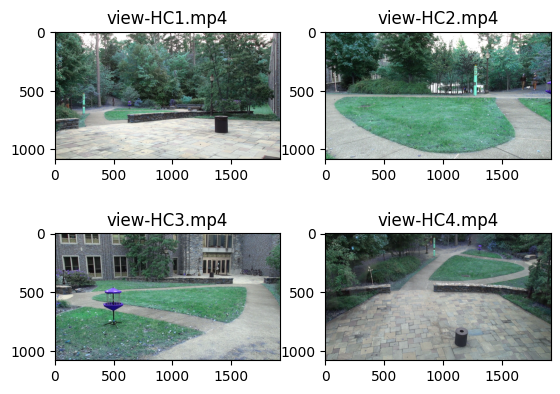

In [7]:
import matplotlib.pyplot as plt
# show all frame in first_frames in a plot
fig, axs = plt.subplots(2,2)
for i, cam in enumerate(list_cams):
    ax = axs[i//2, i%2]
    ax.imshow(first_frames[cam])
    ax.set_title(cam)

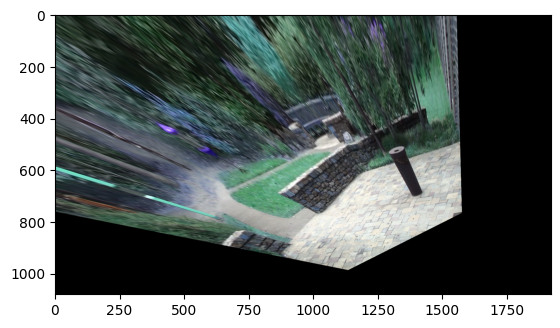

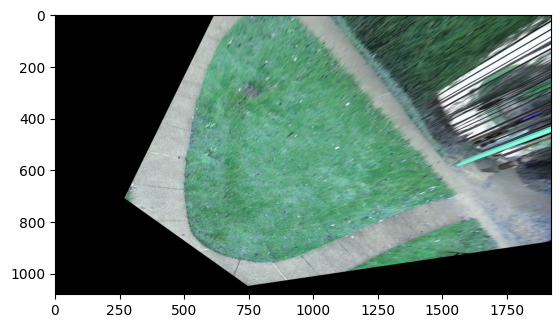

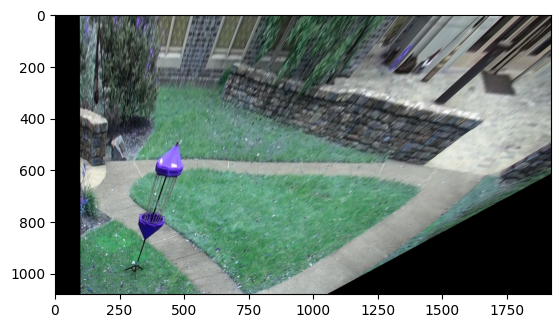

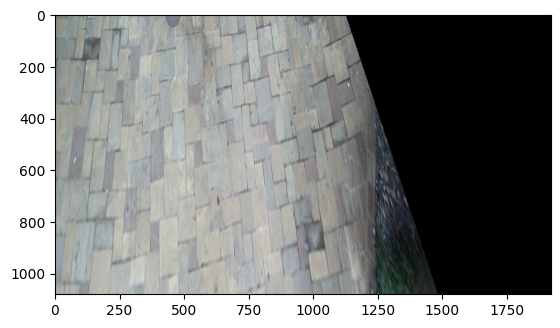

In [30]:

for i,cam in enumerate(list_cams):
    new_frame = cv2.warpPerspective(first_frames[cam],np.array(homography[i]),(frame.shape[1], frame.shape[0]))
    plt.imshow(new_frame)
    plt.show()
# frame = first_frames[list_cams[0]]
# new_frame = cv2.warpPerspective(first_frames[list_cams[0]],np.array(homography[0]),(frame.shape[1], frame.shape[0]))
# plt.imshow(new_frame)
# plt.show()

In [2]:
import gurobipy as gp

# Create a new model
m = gp.Model()

# Create variables
x = m.addVar(vtype='B', name="x")
y = m.addVar(vtype='B', name="y")
z = m.addVar(vtype='B', name="z")
gp.setParam('OutputFlag', 0)
# Set objective function
m.setObjective(x + y + 2 * z, gp.GRB.MAXIMIZE)

# Add constraints
m.addConstr(x + 2 * y + 3 * z <= 4)
m.addConstr(x + y >= 1)

# Solve it!
m.optimize()

print(f"Optimal objective value: {m.objVal}")
print(f"Solution values: x={x.X}, y={y.X}, z={z.X}")

Optimal objective value: 3.0
Solution values: x=1.0, y=0.0, z=1.0


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("preprocessing_output/campus_dataset/garden1/view-contour2.txt")
data.head()

,frame,id,x,y,w,h,conf,center_x,center_y,src,gpx,gpy
0,0,1,391.14,339.91,136.81,385.11,0.93,459.545,532.465,0,-4.741192,-0.131098
1,0,2,1533.21,395.36,113.30,300.13,0.91,1589.860,545.425,0,-1.267508,-0.139508
2,0,3,1155.94,402.89,83.17,226.31,0.91,1197.525,516.045,0,-1.509031,-0.139044
3,0,4,50.36,403.49,78.91,224.50,0.88,89.815,515.740,0,1.758384,-0.145576
4,0,5,752.14,390.84,59.06,159.71,0.86,781.670,470.695,0,-2.112355,-0.137753


In [4]:
data.shape

(261, 12)

In [5]:
import numpy as np
df1 = np.load('extract_feature/campus_dataset/garden1/view-Contour2.npy')
df2 = np.load('extract_feature/campus_dataset/garden1/view-HC2.npy')

In [11]:
df1[0][12:].shape

(512,)

In [14]:
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist
import gurobipy as gp
from gurobipy import GRB

In [15]:
LOCATION_COEF= 0.5 # location importance
LOCATION_THRESH= 47
APPEARANCE_THRESH= 55
APPEARANCE_COEF = 1 - LOCATION_COEF

In [39]:
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist
import gurobipy as gp
from gurobipy import GRB
def matching_points(loc_cost_mat, app_cost_mat):
        """
        Matching two set of points A, B such that:
        - each point in A is paired with at most one point in B and vice versa,
        - distance of each pair must be less than threshold
        To:
        - minimize sum distance
        - maximize number of pairs.

        Args:
        - loc_cost_mat, app_cost_mat (int): distance matrix
        - threshold: maximum distance allow for each pair

        Return:
        List of point-index pairs in the format [(i1, j1), (i2, j2), ...]
        """
        cost_mat = LOCATION_COEF * loc_cost_mat + APPEARANCE_COEF * app_cost_mat

        # Create a new model
        m = gp.Model("matrix1")

        # Disable log output
        m.setParam(GRB.Param.OutputFlag, 0)

        # Create variables
        x = m.addMVar(shape=cost_mat.shape, vtype=GRB.BINARY, name="x")

        # Set objective
        m.setObjective((cost_mat * x).sum() - 1000 * x.sum(), GRB.MINIMIZE)

        # Add constraints
        one0 = np.ones(x.shape[0])
        one1 = np.ones(x.shape[1])
        m.addConstr(x @ one1 <= one0, name="r") # each row has at most one 1
        m.addConstr(x.T @ one0 <= one1, name="c") # each col has at most one 1
        m.addConstr(loc_cost_mat * x <= LOCATION_THRESH) # location threshold
        m.addConstr(app_cost_mat * x <= APPEARANCE_THRESH) # appearance threshold

        # Optimize model
        
        m.optimize()
        matched_indices = np.argwhere(x.X == 1)
        # return matched_indices.tolist()
        return list(zip(*np.where(x.X == 1)))

match_per_frame_dict = dict()
N_FRAMES = 1000

for frame_idx in range(N_FRAMES):
    # Get list of points
    subdf1 = df1[df1[:,0]==frame_idx]
    subdf2 = df2[df2[:,0]==frame_idx]
    if len(subdf1) == 0 or len(subdf2) == 0:
        matches = []
    else:
        # List IDs
        ids1, ids2 = subdf1[:,1], subdf2[:,1]

        # Calculate distance matrix
        points1 = subdf1[:,[10,12]]
        points2 = subdf2[:,[10,12]]
        loc_cost_mat = distance_matrix(points1, points2)
        apps1 = subdf1[:,12:]
        apps2 = subdf2[:,12:]
        app_cost_mat = cdist(apps1, apps2, metric='cosine')
        # print(app_cost_mat)
        # Match
        loc_cost_mat = loc_cost_mat.astype(int)
        app_cost_mat = (app_cost_mat * 100).astype(int)
        match = matching_points(loc_cost_mat, app_cost_mat)
        print(match)
        break

[[0, 1], [1, 2], [2, 0], [3, 3]]


In [38]:
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist
import gurobipy as gp
from gurobipy import GRB
match_per_frame_dict = dict()
N_FRAMES = 1000

for frame_idx in range(N_FRAMES):
    # Get list of points
    subdf1 = df1[df1[:,0]==frame_idx]
    subdf2 = df2[df2[:,0]==frame_idx]
    if len(subdf1) == 0 or len(subdf2) == 0:
        matches = []
    else:
        # List IDs
        ids1, ids2 = subdf1[:,1], subdf2[:,1]

        # Calculate distance matrix
        points1 = subdf1[:,[10,12]]
        points2 = subdf2[:,[10,12]]
        loc_cost_mat = distance_matrix(points1, points2)
        apps1 = subdf1[:,12:]
        apps2 = subdf2[:,12:]
        app_cost_mat = cdist(apps1, apps2, metric='cosine')
        # print(app_cost_mat)
        # Match
        loc_cost_mat = loc_cost_mat.astype(int)
        app_cost_mat = (app_cost_mat * 100).astype(int)
        match = matching_points(loc_cost_mat, app_cost_mat)
        print(match.X)
        break



    # # Record matches
    # match_per_frame_dict[frame_idx] = []
    # for i, j in matches:
    #     match_per_frame_dict[frame_idx].append((int(ids1[i]), int(ids2[j])))

    # # Log
    # if frame_idx % 100 == 99:
    #     if multitask:
    #         status.put([f"{name1}-{name2}", frame_idx / self.N_FRAMES])
    #     else: 
    #         print([f"{name1}-{name2} {int(frame_idx / self.N_FRAMES * 100):d}%", ])

[[-0.  1.  0. -0.]
 [ 0. -0.  1.  0.]
 [ 1. -0. -0.  0.]
 [-0. -0. -0.  1.]
 [ 0.  0.  0.  0.]]


AttributeError: 'gurobipy.MVar' object has no attribute 'X'

In [33]:
match.shape

(5, 4)